#### Турчин Максим 1223
### Домашние задания

1. Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (`eta`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?  

In [3]:
#pip install matplotlib

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('seaborn-ticks')

In [8]:
# Исходные данные

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # условный коэффициент
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж преподавания (лет)
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]


In [9]:
# Запишем функции вычисления метрик (используем mae и mse)
def calc_mae(y, y_pred):
    '''функция вычисления mae'''
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    '''функция вычисления mse'''
    err = np.mean((y - y_pred)**2)
    return err

In [10]:
# Для формирования "ЭТАЛОННЫХ" значений коэффициентов применим метод наименьших квадратов
# вычислим коэффициенты и будем на них ориентироваться
w = np.linalg.inv(X.T @ X) @ X.T @ y
print('Запишем коэффициенты, вычисленные по МНК, и метрику:')
print(f'Коэффициенты: \t{w}, \nОшибка mse: \t{calc_mse(y, w @ X.T)}')

Запишем коэффициенты, вычисленные по МНК, и метрику:
Коэффициенты: 	[47.23214286  3.91071429], 
Ошибка mse: 	45.937499999999986


In [11]:
eta_base = [0.0001, 0.0005, 0.001]

In [14]:
w = np.array([1, 0.5])
n = X.shape[0]
iterations = 3001
eta_list = []
mse_list = []
 
for eta in eta_base:
    eta_list.append(eta)
    errs = []
    for t in range(iterations):
        y_pred = np.dot(w, X.T)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
        errs.append(err)
    mse_list.append(errs)

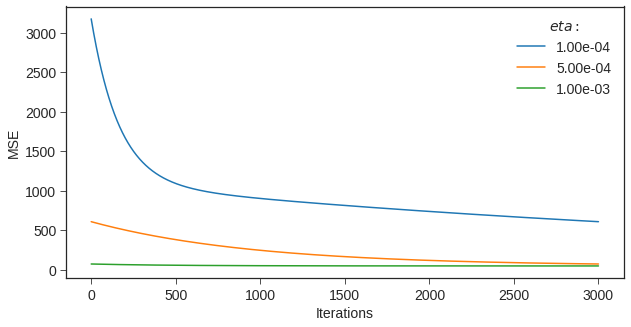

In [15]:
for i in range(len(eta_list)):
    plt.plot(range(iterations), mse_list[i], label='{:.2e}'.format(eta_list[i]))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(title=r'$eta:$');

In [20]:
# Проверим при высокой скорости обучения
n = X.shape[0]
eta = 0.07
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [ 8.714 24.3  ] 3173.15
100 [ 90145.66877384 487925.52597244] 3006560937495.4287
200 [3.42406430e+09 1.85427696e+10] 4.3422928006532086e+21
300 [1.30126711e+14 7.04691687e+14] 6.271453384410737e+30
400 [4.94528129e+18 2.67808092e+19] 9.057686655059327e+39
500 [1.87938409e+23 1.01776671e+24] 1.3081766300802822e+49
600 [7.14233298e+27 3.86787820e+28] 1.8893633227335074e+58
700 [2.71434246e+32 1.46993231e+33] 2.7287551873415993e+67
800 [1.0315474e+37 5.5862695e+37] 3.941065639863664e+76
900 [3.92024973e+41 2.12298258e+42] 5.6919720940028355e+85
1000 [1.48983537e+46 8.06809452e+46] 8.220757855742908e+94


Выводы:

При фиксированной скорости обучения ошибка уменьшается, пока не достигнет своего минимума (с увеличением числа итераций).

Чем выше скорость обучения (eta), тем меньше требуется итераций, чтобы алгоритм нашел оптимальные веса.

При увеличении скорости обучения (eta) алгоритм выходит из минимума функции потерь и ошибка начинает расти.

формула вычисления градиента имеет вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

In [39]:
# Правилиный код
n = X.shape[0]
eta = 0.01
iterations = 1001
w = np.array([1, 0.5])
err = []
for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= eta * (1/n * 2 * (X.T @ (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001842
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере $\text{diff}=10^{-6}$, а значение $\eta=10^{-2}$?

In [53]:
w = np.array([1, 0.5])
diff = 1e-6
eta = 1e-2
n = X.shape[0]
iterations = 5001
w = np.array([1, 0.5])
err = []
err_1 = 10000
for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err.append(err_1)
    err_1 = calc_mse(y, y_pred)
    
    #print(err[-1], err_1)
    if err[-1] -  err_1 <= diff:
        break
    w -= eta * (1/n * 2 * (X.T @ (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err_1) # [47.23214286  3.91071429] 45.
print(i)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001842
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
809
